# Classifying Mnist Fashion Using CNN
By : Hesham Asem

______


let's build Conv2D Neural Network , to classify tens of thousands of mnist Fashion images . . 

Data File  :https://www.kaggle.com/zalando-research/fashionmnist

first to import needed libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten ,Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau



/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

then read the data 

In [2]:
train_data = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")
test_data = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")

print(f'Training Data size is : {train_data.shape}')
print(f'Test Data size is : {test_data.shape}')

Training Data size is : (10000, 785)
Test Data size is : (10000, 785)


how it looks like ? 

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


_____

# Data Processing

then we can define X & y data for training

In [5]:
X = train_data.drop(['label'], axis=1, inplace=False)
y = train_data['label']

print('X shape is ' , X.shape)
print('y shape is ' , y.shape)

X shape is  (10000, 784)
y shape is  (10000,)


and for testing

In [6]:
X_test = test_data.drop(['label'], axis=1, inplace=False)
y_test = test_data['label']

print('X shape is ' , X_test.shape)
print('y shape is ' , y_test.shape)

X shape is  (10000, 784)
y shape is  (10000,)


let's have a look to a random 20 numbers 

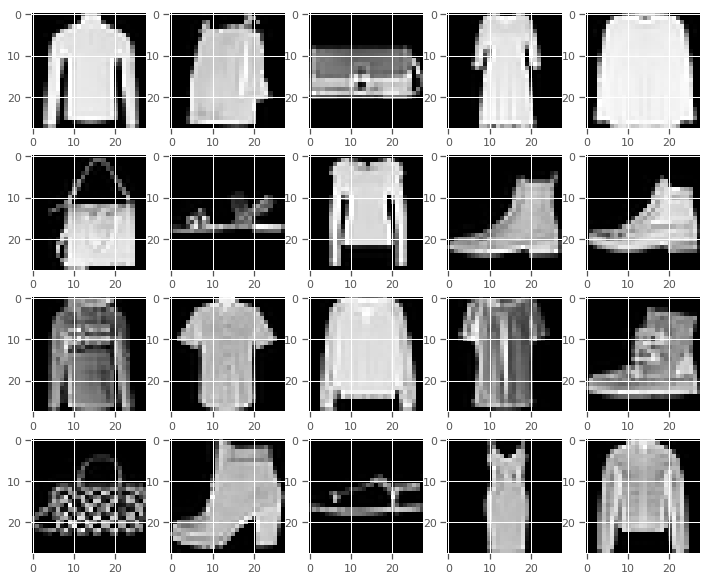

In [7]:
plt.figure(figsize=(12,10))
plt.style.use('ggplot')
for i in  range(20)  :
    plt.subplot(4,5,i+1)
    plt.imshow(X.values[ np.random.randint(1,X.shape[0])].reshape(28,28) , cmap='gray')
    

we also need to be sure that output numbers are kinda equally distributed for training data

In [8]:
y.value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

and for testing data

In [9]:
y_test.value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

Ok great , let's make a pie chart for training output

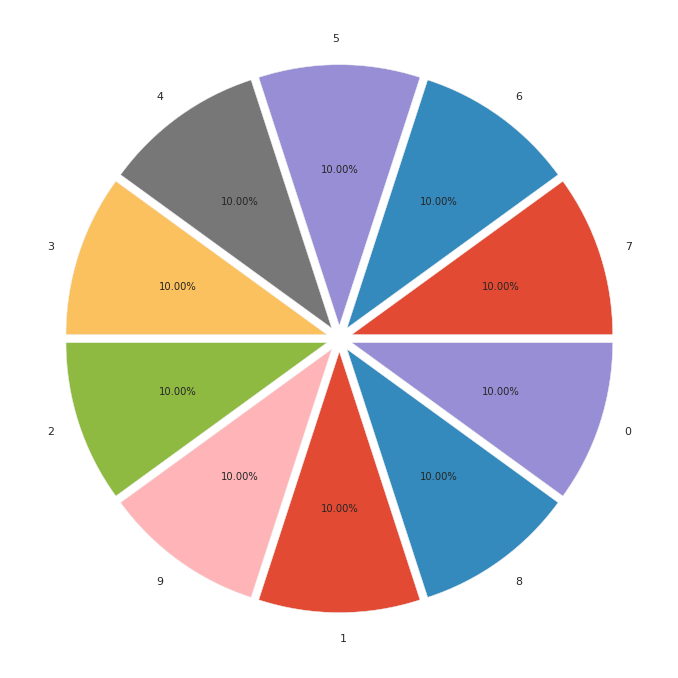

In [10]:
plt.figure(figsize=(12,12))
plt.pie(y.value_counts(),labels=list(y.value_counts().index),autopct ='%1.2f%%' ,
        labeldistance = 1.1,explode = [0.05 for i in range(len(y.value_counts()))] )
plt.show()


____

# Dimension Adjusting

it;s very important to adjust dimensions for data before building the CNN , let's first normalize both traing & test data . 

ofcourse y will not be normalized or it will mislead the training

In [11]:
X = X / 255.0
X_test = X_test / 255.0

now how train data dimension looks like

In [12]:
X.shape

(10000, 784)

and test data

In [13]:
X_test.shape

(10000, 784)

then we need to reshape them , to be 4 dimensions , so first dimension will be open for all sample size , then 28 x 28 as image size , then 1

In [14]:
X = X.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

now how X dimension looks like

In [15]:
X.shape

(10000, 28, 28, 1)

and test data ? 

In [16]:
X_test.shape

(10000, 28, 28, 1)

also we have to categorize y , to convert single numbers like (7) into One Hot Matrix like [0 0 0 0 0 0 1 0 0 0]

In [17]:
ohe  = OneHotEncoder()
y = np.array(y)
y = y.reshape(len(y), 1)
ohe.fit(y)
y = ohe.transform(y).toarray()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


now how y looks like ? 

In [18]:
y.shape

(10000, 10)

then we'll do it again to test output data

In [19]:
ohe  = OneHotEncoder()
y_test = np.array(y_test)
y_test = y_test.reshape(len(y_test), 1)
ohe.fit(y_test)
y_test = ohe.transform(y_test).toarray()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


and check its dimension

In [20]:
y_test.shape

(10000, 10)

____

# Data Splitting .

we have to split our train data ,  to get cross-validation data , and train data


In [21]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.15, random_state=44, shuffle =True)

print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_cv.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_cv.shape)

X_train shape is  (8500, 28, 28, 1)
X_test shape is  (1500, 28, 28, 1)
y_train shape is  (8500, 10)
y_test shape is  (1500, 10)


____

# Conv2D Model

now we can build our model , which will contain Conv layer then Maxpooling then normalize it 

then second layer contain Conv then Max then normalize

then drop it out with 50 %

then Flatten it 

then drop it out , then a FC with 64 units , then drop out , then last FC output layer 

In [22]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (3,3),  activation = tf.nn.relu , padding = 'same'),
        keras.layers.MaxPool2D(pool_size=(2,2), strides=None, padding='valid'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=32, kernel_size=(2,2),activation = tf.nn.relu , padding='same'),
        keras.layers.MaxPool2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),        
        keras.layers.Flatten(),    
        keras.layers.Dropout(0.5),        
        keras.layers.Dense(64),    
        keras.layers.Dropout(0.3),            
        keras.layers.Dense(units= 10,activation = tf.nn.softmax ),                

    ])

complie the model using adam optimizer & loss function : categorical crossentropy , since it's multilassifier

In [23]:
KerasModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

now we can start training for 200 epochs . 

In [24]:
epochs_number = 200
hist = KerasModel.fit(X_train,y_train,validation_data=(X_cv, y_cv),epochs=epochs_number,batch_size=64,verbose=1)

Train on 8500 samples, validate on 1500 samples
Epoch 1/200
8500/8500 [==============================] - 3s 385us/step - loss: 2.0032 - acc: 0.6288 - val_loss: 0.6847 - val_acc: 0.8187
Epoch 2/200
8500/8500 [==============================] - 1s 106us/step - loss: 1.1421 - acc: 0.7399 - val_loss: 0.5060 - val_acc: 0.8433
Epoch 3/200
8500/8500 [==============================] - 1s 108us/step - loss: 0.9043 - acc: 0.7629 - val_loss: 0.4919 - val_acc: 0.8413
Epoch 4/200
8500/8500 [==============================] - 1s 106us/step - loss: 0.7578 - acc: 0.7768 - val_loss: 0.4385 - val_acc: 0.8547
Epoch 5/200
8500/8500 [==============================] - 1s 106us/step - loss: 0.6375 - acc: 0.7981 - val_loss: 0.3925 - val_acc: 0.8713
Epoch 6/200
8500/8500 [==============================] - 1s 105us/step - loss: 0.5488 - acc: 0.8165 - val_loss: 0.3865 - val_acc: 0.8673
Epoch 7/200
8500/8500 [==============================] - 1s 110us/step - loss: 0.5300 - acc: 0.8211 - val_loss: 0.3935 - val_acc: 

8500/8500 [==============================] - 1s 105us/step - loss: 0.2988 - acc: 0.8898 - val_loss: 0.2897 - val_acc: 0.9013
Epoch 61/200
8500/8500 [==============================] - 1s 103us/step - loss: 0.2916 - acc: 0.8940 - val_loss: 0.3309 - val_acc: 0.8793
Epoch 62/200
8500/8500 [==============================] - 1s 107us/step - loss: 0.2876 - acc: 0.8932 - val_loss: 0.3387 - val_acc: 0.8747
Epoch 63/200
8500/8500 [==============================] - 1s 105us/step - loss: 0.2917 - acc: 0.8933 - val_loss: 0.3102 - val_acc: 0.8853
Epoch 64/200
8500/8500 [==============================] - 1s 106us/step - loss: 0.2920 - acc: 0.8953 - val_loss: 0.3014 - val_acc: 0.8980
Epoch 65/200
8500/8500 [==============================] - 1s 106us/step - loss: 0.2890 - acc: 0.8941 - val_loss: 0.2985 - val_acc: 0.9000
Epoch 66/200
8500/8500 [==============================] - 1s 103us/step - loss: 0.2868 - acc: 0.8938 - val_loss: 0.2945 - val_acc: 0.8980
Epoch 67/200
8500/8500 [=======================

8500/8500 [==============================] - 1s 104us/step - loss: 0.2249 - acc: 0.9154 - val_loss: 0.2641 - val_acc: 0.9107
Epoch 179/200
8500/8500 [==============================] - 1s 106us/step - loss: 0.2289 - acc: 0.9172 - val_loss: 0.2621 - val_acc: 0.9167
Epoch 180/200
8500/8500 [==============================] - 1s 105us/step - loss: 0.2260 - acc: 0.9158 - val_loss: 0.2719 - val_acc: 0.9033
Epoch 181/200
8500/8500 [==============================] - 1s 104us/step - loss: 0.2238 - acc: 0.9214 - val_loss: 0.2700 - val_acc: 0.9033
Epoch 182/200
8500/8500 [==============================] - 1s 106us/step - loss: 0.2299 - acc: 0.9151 - val_loss: 0.2621 - val_acc: 0.9127
Epoch 183/200
8500/8500 [==============================] - 1s 106us/step - loss: 0.2244 - acc: 0.9174 - val_loss: 0.2927 - val_acc: 0.8953
Epoch 184/200
8500/8500 [==============================] - 1s 104us/step - loss: 0.2192 - acc: 0.9215 - val_loss: 0.2593 - val_acc: 0.9113
Epoch 185/200
8500/8500 [================

how is the final loss & accuracy

In [25]:
score = KerasModel.evaluate(X_test, y_test, verbose=0)
score

[0.13573122632950543, 0.9557]

greart . how it looks like now ? 

In [26]:
KerasModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
__________

how is accuracy for test data , which never seen by the model yet

In [27]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

10000/10000 [==============================] - 1s 59us/step
Test Loss is 0.13573122632950543
Test Accuracy is 0.9557


a good accuracy , and might increase if we make more epochs

_____

now let's have a look to chart of epochs-accuracy , to know if we should do more epochs or we shpuld stop earlier

first to calculate history accuracy values

In [28]:
ModelAcc = hist.history['acc']
ValAcc = hist.history['val_acc']
LossValue = hist.history['loss']
ValLoss = hist.history['val_loss']
epochs = range(len(ModelAcc))

then draw Training accuracy with epocs

<Figure size 432x288 with 0 Axes>

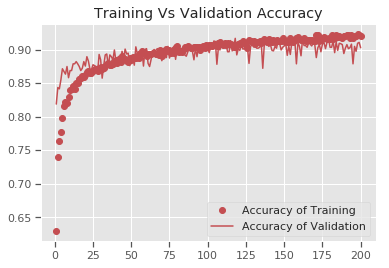

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(range(1,epochs_number+1),ModelAcc, 'ro', label='Accuracy of Training ')
plt.plot(range(1,epochs_number+1), ValAcc, 'r', label='Accuracy of Validation')
plt.title('Training Vs Validation Accuracy')
plt.legend()
plt.figure()


ok , looks like more epochs might be needed for the model , which will increase its accuracy 

how about loss value

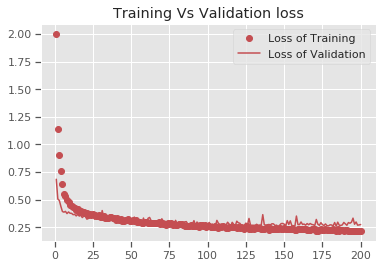

In [30]:
plt.plot(range(1,epochs_number+1), LossValue, 'ro', label='Loss of Training ')
plt.plot(range(1,epochs_number+1), ValLoss, 'r', label='Loss of Validation')
plt.title('Training Vs Validation loss')
plt.legend()
plt.show()

again , more epochs here will decrease the loss in the model 

_____

now to predict X Test

In [31]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (10000, 10)


let's check random 20 samples , & we need to have a look to any mismatch images , to see why it confused

In [33]:
for i in list(np.random.randint(0,len(X_test) ,size= 20)) : 
    print(f'for sample  {i}  the predicted value is   {np.argmax(y_pred[i])}   , while the actual letter is {np.argmax(y_test[i])}')
    if np.argmax(y_pred[i]) != np.argmax(y_test[i]) : 
        print('==============================')
        print('Found mismatch . . ')
        plt.figure(figsize=(5,5))
        plt.style.use('ggplot')
        plt.imshow(X_test[i].reshape(28,28))
        plt.show()
        print('==============================')

for sample  5916  the predicted value is   9   , while the actual letter is 9
for sample  5938  the predicted value is   3   , while the actual letter is 3
for sample  8945  the predicted value is   2   , while the actual letter is 2
for sample  3968  the predicted value is   7   , while the actual letter is 7
for sample  9426  the predicted value is   1   , while the actual letter is 1
for sample  152  the predicted value is   3   , while the actual letter is 3
for sample  2023  the predicted value is   5   , while the actual letter is 5
for sample  6137  the predicted value is   5   , while the actual letter is 5
for sample  3024  the predicted value is   9   , while the actual letter is 9
for sample  849  the predicted value is   8   , while the actual letter is 8
for sample  4574  the predicted value is   9   , while the actual letter is 9
for sample  5153  the predicted value is   7   , while the actual letter is 7
for sample  5183  the predicted value is   3   , while the actual 

____

ok no mismatch found . 

